In [3]:
import h5py
import json
import random
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import pydicom
from tqdm import tqdm
sys.path.append('./src')
import numpy as np
#from generators import DataGenerator
from generator_hamdi import DataGenerator

from models import dota_energies
from preprocessing import DataRescaler
from preprocessing_hamdi import get_scaling_factors
from tensorflow_addons.optimizers import LAMB
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.config import list_physical_devices
print(list_physical_devices('GPU'))
import tensorflow as tf
print(tf.__version__)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]
2.11.0


In [37]:
data_df=pd.read_pickle(os.path.join(path,'main_picklefile_correct.pkl'))
okey='DoseAll'
ikey='GeometryAll'
lijst=data_df['cropped_geometry_name'].unique().tolist()

In [52]:
mask = data_df['shape'] == (68, 68, 150)

# Apply the mask to the DataFrame to keep only the rows with the desired shape
filtered_df = data_df[mask]

In [53]:
filtered_df=filtered_df.reset_index(drop=True)

In [56]:
filtered_df['shape'].value_counts()

(68, 68, 150)    14708
Name: shape, dtype: int64

In [55]:
filtered_df.to_pickle(os.path.join(path,'main_picklefile_correct.pkl'))

In [36]:
path = r"/tudelft.net/staff-umbrella/simelectrons/OneGeometryOneEnergy"

values=['e6759932-f323-4e16-beab-2a06ab7adda1', 'f9e24a30-ba23-4e94-85a0-ea68ecf50ca8', 'dacafac5-7176-4e1c-be3b-37ee570c3d08', '8317d0dc-9ab7-4962-a8f0-91026c9206bf', '8cefb33d-eca7-4c83-b394-deff026a9ba7', '7e305765-243a-4493-b448-54342215f71f', '9a700c63-17b8-4a2e-8da4-14f4adda7af0', '989fcbbc-0cc9-4f39-9216-774ed2e7320b']
for val in values:
    geom=pydicom.read_file(os.path.join(path,'GeometryAll',val+'.dcm'))
    print(geom.pixel_array.shape)

(68, 68, 150)
(68, 68, 150)
(68, 68, 150)
(68, 68, 150)
(68, 68, 150)
(68, 68, 150)
(68, 68, 150)
(13, 34, 68)


In [29]:
'8c3f074a-4a5d-45bd-9083-bc146d51f6f1' in data_df['cropped_dose_name'].tolist()

True

In [16]:
geometry_list=data_df['cropped_geometry_name'].tolist()

geometry=pydicom.dcmread(os.path.join(path,ikey,data_df['cropped_geometry_name'].iloc[0]+'.dcm')).pixel_array
dose=pydicom.dcmread(os.path.join(path,okey,data_df['cropped_dose_name'].iloc[0]+'.dcm')).pixel_array

    

            

In [21]:
dose_swapped.shape

(150, 68, 68)

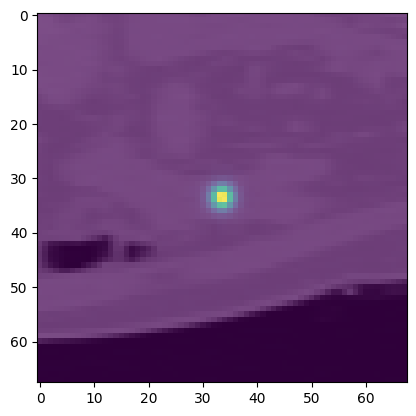

In [33]:
index=75
rot=4
geomerty_swapped=np.rot90(np.swapaxes(geometry,0,2),rot,axes=(1,2))
dose_swapped=np.rot90(np.swapaxes(dose,0,2),rot,axes=(1,2))
plt.imshow(geomerty_swapped[index,:,:],cmap='gray')
plt.imshow(dose_swapped[index,:,:],alpha=0.7)

In [8]:
os.listdir(path)

array=pydicom.dcmread(os.path.join(path,'GeometryAll',lijst[0]+'.dcm')).pixel_array


In [11]:
x=(150,25,25)
tuple(map(lambda i, j: i - j, x, (0,1,1)))

(150, 24, 24)

In [28]:
data_df=pd.read_pickle(os.path.join(path,'main_picklefile_correct.pkl'))
okey='DoseAll'
ikey='GeometryAll'
lijst=data_df['cropped_geometry_name'].unique().tolist()
for filename in tqdm(lijst):
    geometry=pydicom.dcmread(os.path.join(path,ikey,filename+'.dcm')).pixel_array


    metadata_dose=pydicom.dcmread(os.path.join(path,okey,data_df[data_df['cropped_geometry_name']==filename].iloc[0]['cropped_dose_name']+'.dcm'))
    dose=metadata_dose.pixel_array*metadata_dose.DoseGridScaling

  0%|          | 0/14714 [00:00<?, ?it/s]

  3%|▎         | 502/14714 [00:07<03:42, 63.83it/s] 


KeyboardInterrupt: 

In [2]:
lijst=['64363fa5-f990-47e2-a99d-e02b986391d2', '0242af02-8ce6-4df0-855e-c4c26aab41a8', '45832e8f-9cb3-4d01-a854-5287ff41e089', 'c2f8d06b-3866-46f4-9e1f-3045bcc0f0ad', '9b5409e3-5837-4526-90b3-7b95bc9d5a48', '39eb1ab9-59d9-43a8-b154-1c4162e20798', '7b28ef76-4fd4-4f6a-97e6-0782a9a05c8a', '03907b16-679f-4393-b7d7-3f075eef66f4']

In [12]:
path_dose=r"/tudelft.net/staff-umbrella/simelectrons/OneGeometryOneEnergy/DoseAll"
os.listdir(path_dose)


'64363fa5-f990-47e2-a99d-e02b986391d2.dcm' in os.listdir(path_dose)

False

In [14]:
data_df

,text_file_names,dose_file_names,energy,beam coordinates,angles,ct_name,cropped_dose_name,cropped_geometry_name,shape
0,8.000000-Abdomen__5.0__B30f-53399.txt,8.000000-Abdomen__5.0__B30f-53399_Run_0000,100.0,"(18.6, -11.8, -5.7)","(0, 90)",8.000000-Abdomen__5.0__B30f-53399,84bf4b6c-b1e2-4c59-808b-95e21e2f38d8,8b502228-c440-4030-9f25-5d3be92bc943,"(68, 68, 150)"
1,8.000000-Abdomen__5.0__B30f-53399.txt,8.000000-Abdomen__5.0__B30f-53399_Run_0001,100.0,"(18.6, -10.8, -5.7)","(0, 90)",8.000000-Abdomen__5.0__B30f-53399,53267646-b81a-44e9-9427-8d284d8a9d58,cc680195-2382-4488-b892-a07061c16c96,"(68, 68, 150)"
2,8.000000-Abdomen__5.0__B30f-53399.txt,8.000000-Abdomen__5.0__B30f-53399_Run_0002,100.0,"(18.6, -9.8, -5.7)","(0, 90)",8.000000-Abdomen__5.0__B30f-53399,426e5c21-3bf8-4b84-ab86-97a95ffffe4f,a40da29c-29ba-4f2a-98e2-2c5401bec5f5,"(68, 68, 150)"
3,8.000000-Abdomen__5.0__B30f-53399.txt,8.000000-Abdomen__5.0__B30f-53399_Run_0003,100.0,"(18.6, -8.8, -5.7)","(0, 90)",8.000000-Abdomen__5.0__B30f-53399,c1d79770-7f94-4af0-8fce-87135967827f,5816398b-84c9-4d36-9094-2430d80df9b8,"(68, 68, 150)"
4,8.000000-Abdomen__5.0__B30f-53399.txt,8.000000-Abdomen__5.0__B30f-53399_Run_0004,100.0,"(18.6, -7.8, -5.7)","(0, 90)",8.000000-Abdomen__5.0__B30f-53399,cfa0de55-6a9f-4682-b4c7-3fe73ae5c240,88b5042e-d97e-4431-934e-87aa6e85afdc,"(68, 68, 150)"
...,...,...,...,...,...,...,...,...,...
14721,6.000000-Venous_Phase__5.0__B30f-07862.txt,6.000000-Venous_Phase__5.0__B30f-07862_Run_1559,100.0,"(6.6, 18.2, 8.0)","(270, 0)",6.000000-Venous_Phase__5.0__B30f-07862,654d8ea5-925f-4309-8443-9e2d489f9387,cfbd51ac-b23f-4e48-adb9-285e3cfabc51,"(68, 68, 150)"
14722,6.000000-Venous_Phase__5.0__B30f-07862.txt,6.000000-Venous_Phase__5.0__B30f-07862_Run_1560,100.0,"(7.6, 18.2, 8.0)","(270, 0)",6.000000-Venous_Phase__5.0__B30f-07862,9201fcee-3f84-4fd5-9783-3ce59e1191b2,f95e5079-7c84-4d35-8a86-c183aa65ae4f,"(68, 68, 150)"
14723,6.000000-Venous_Phase__5.0__B30f-07862.txt,6.000000-Venous_Phase__5.0__B30f-07862_Run_1561,100.0,"(8.6, 18.2, 8.0)","(270, 0)",6.000000-Venous_Phase__5.0__B30f-07862,25b86fbb-b088-403e-8b0f-132b20c3d546,e05e1354-c763-4639-88b4-ea13095474d2,"(68, 68, 150)"
14724,6.000000-Venous_Phase__5.0__B30f-07862.txt,6.000000-Venous_Phase__5.0__B30f-07862_Run_1562,100.0,"(9.6, 18.2, 8.0)","(270, 0)",6.000000-Venous_Phase__5.0__B30f-07862,2a4a06de-4cdf-4694-b2ff-59acdcf62f3b,15bad4f1-9eb1-4cab-9a7e-6706b0b39dd3,"(68, 68, 150)"


In [22]:
ikey='DoseAll'
okey='GeometryAll'
for filename in tqdm(lijst):
    geometry=pydicom.dcmread(os.path.join(path,ikey,filename+'.dcm')).pixel_array


    metadata_dose=pydicom.dcmread(os.path.join(path,okey,data_df[data_df['cropped_geometry_name']==lijst[0]].iloc[0]['cropped_dose_name']+'.dcm'))
    dose=metadata_dose.pixel_array*metadata_dose.DoseGridScaling

  0%|          | 0/14726 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/tudelft.net/staff-umbrella/simelectrons/OneGeometryOneEnergy/DoseAll/8b502228-c440-4030-9f25-5d3be92bc943.dcm'

2.11.0


In [4]:

data_df=pd.read_pickle(os.path.join(path,'main_picklefile.pkl'))



In [17]:
def get_scaling_factors(path,ikey,okey,df):

    e_min=df['energy'].min()
    e_max=df['energy'].max()
    
    min_value, max_value = -np.float32('inf'), np.float32('inf')
    error_list=[]
    geometry_list=df['cropped_geometry_name'].tolist()
    for i in tqdm(range(len(geometry_list))):

        try:

            geometry=pydicom.dcmread(os.path.join(path,ikey,df['cropped_geometry_name'].iloc[i]+'.dcm')).pixel_array
            metadata_dose=pydicom.dcmread(os.path.join(path,okey,df['cropped_dose_name'].iloc[i]+'.dcm'))
            dose=metadata_dose.pixel_array*metadata_dose.DoseGridScaling
            

            x_max, x_min = min(max_value, np.max(geometry)),max(min_value, np.min(geometry))
            y_max, y_min = min(max_value, np.max(dose)),max(min_value, np.min(dose))
        except Exception as e:
            print(e)
            print(df['cropped_geometry_name'].iloc[i])
            error_list.append(df['cropped_geometry_name'].iloc[i])
            continue

    
    scaling_dic={'x_min': float(x_min),'x_max':float(x_max),
                'y_min':float(y_min),'y_max':float(y_max),
                'e_min':float(e_min),'e_max':float(e_max)}
    
    return error_list,scaling_dic
        


In [35]:
df_correct=data_df[~data_df['cropped_geometry_name'].isin(error_list)]

In [37]:
df_correct
df_correct.to_pickle(os.path.join(path,'main_picklefile_correct.pkl'))

In [23]:
error_list,scaling_dic=get_scaling_factors(path,'GeometryAll','DoseAll', data_df)

 16%|█▌        | 2306/14726 [08:13<40:01,  5.17it/s]  

object of type 'NoneType' has no len()
9e7f7192-6fe5-4e8a-a532-a47c2b665780


 18%|█▊        | 2703/14726 [09:06<15:38, 12.81it/s]

object of type 'NoneType' has no len()
0bbbcfd2-9bcf-4b32-8205-06d67b4ec1fa


 22%|██▏       | 3207/14726 [09:53<13:06, 14.64it/s]

object of type 'NoneType' has no len()
9c0f0be1-9306-48cb-9ceb-3f6e746794bd


 22%|██▏       | 3308/14726 [10:06<27:53,  6.82it/s]

object of type 'NoneType' has no len()
e46d7b72-3820-4f65-9ab9-dc6be5d183d7


 23%|██▎       | 3427/14726 [10:19<02:56, 64.18it/s]

object of type 'NoneType' has no len()
b0b1343a-1968-429f-b515-2ffe2bf43ba2


 26%|██▌       | 3833/14726 [10:23<01:28, 122.52it/s]

object of type 'NoneType' has no len()
e907c92f-1f3c-46e7-8a08-c01a94d7d647
object of type 'NoneType' has no len()
1ef81f68-ab30-43ef-a36a-3fe7f63802f7


 31%|███       | 4542/14726 [10:29<01:28, 115.32it/s]

object of type 'NoneType' has no len()
ca6772df-b522-4ed2-941a-09f9f53b4372
object of type 'NoneType' has no len()
4e974765-7875-4348-8cd2-46e2790c5777


 36%|███▋      | 5361/14726 [10:55<39:07,  3.99it/s] 

object of type 'NoneType' has no len()
392ee8d2-29c6-42d7-8a56-a3376fd8f434


 37%|███▋      | 5386/14726 [11:00<41:07,  3.79it/s]

object of type 'NoneType' has no len()
c9f68908-ab81-4df3-9532-5a14518495c6


 66%|██████▋   | 9770/14726 [29:46<14:25,  5.73it/s]  

object of type 'NoneType' has no len()
25331cd2-9399-4d8d-a4c4-6fffa915364a


100%|██████████| 14726/14726 [49:03<00:00,  5.00it/s]


In [4]:
'''Initializing Batch size num epochs learning rate and weight decay. This is the same in my model'''
batch_size = 2
num_epochs = 30
learning_rate = 0.001
weight_decay = 0.0001

'''Initializing the number of tokens, projection dimension, number of heads, number of transformers and kernel size. This is the same in my model'''
# Load model and data hyperparameters
with open('./hyperparam.json', 'r') as hfile:
    param = json.load(hfile)

preprocess=False
# Load data files
path = r"/tudelft.net/staff-umbrella/simelectrons/OneGeometryOneEnergy"
data_df=pd.read_pickle(os.path.join(path,'main_picklefile_correct.pkl'))
path_ckpt = './weights/ckpt/weights.ckpt'
filename = path + 'train.h5'
train_split = 0.7
val_split = 0.15
test_split = 0.15

listIDs=data_df['cropped_geometry_name'].tolist()

# Training, validation, test split.
random.seed(333)
random.shuffle(listIDs)

trainIDs = listIDs[:int(round(train_split*len(listIDs)))]
valIDs = listIDs[int(round(train_split*len(listIDs))):]
testIDs = listIDs[int(round((train_split + val_split)*len(listIDs))):]

test_df=data_df[data_df['cropped_geometry_name'].isin(testIDs)]
test_df.to_pickle(os.path.join(path,'test_picklefile.pkl'))



# Calculate or load normalization constants.

if preprocess==True:
    scale = get_scaling_factors(path,'GeometryAll','DoseAll', data_df)
    scale_json = json.dumps(scale)
    with open('scale.json', 'w') as file:
        file.write(scale_json)

with open('scale.json', 'r') as file:
    scale_json = file.read()
scale = json.loads(scale_json)


train_gen = DataGenerator(trainIDs, path, batch_size, data_df, scale)
val_gen = DataGenerator(valIDs,  path, batch_size, data_df, scale)


transformer = dota_energies(
    num_tokens=param['num_tokens'],
    input_shape=param['data_shape'],
    projection_dim=param['projection_dim'],
    num_heads=param['num_heads'],
    num_transformers=param['num_transformers'], 
    kernel_size=param['kernel_size'],
    causal=True
)
transformer.summary()

optimizer = LAMB(learning_rate=learning_rate, weight_decay_rate=weight_decay)
#transformer.compile(optimizer=optimizer, loss='mse', metrics=[])

(None, 150, 68, 68, 1)


2024-01-17 18:25:23.139072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 18:25:24.745146: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43454 MB memory:  -> device: 2, name: NVIDIA A40, pci bus id: 0000:d8:00.0, compute capability: 8.6


(None, 150, 34, 34, 64)
(None, 150, 17, 17, 64)
(None, 1, 3468) (None, 150, 3468)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 68, 68  0           []                               
                                , 1)]                                                             
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 conv_encoder (ConvEncoder)     (None, 151, 3468)    654084      ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
            

In [9]:
checkpoint = ModelCheckpoint(
    filepath=path_ckpt,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min')

sel_epochs = [4,8,12,16,20,24,28]
lr_scheduler = LearningRateScheduler(
    lambda epoch, lr: lr*0.5 if epoch in sel_epochs else lr,
    verbose=1)

optimizer.learning_rate.assign(learning_rate)





<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.001>

In [10]:
history = transformer.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=num_epochs,
    verbose=1,
    callbacks=[checkpoint, lr_scheduler]
    )


['96fc82f6-7eca-43b2-a70a-2ab81bce5a8c', '7fcefb5d-3f20-47f7-9ef8-71e2fe525bec']


2it [01:21, 40.94s/it]



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/30
['fafe262b-9923-4c2f-b061-8aa1a8cf467f', '5975dbef-313c-4c75-a73f-479f80683189']


0it [00:00, ?it/s]2024-01-13 16:19:09.571194: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2it [01:21, 40.75s/it]


['38f7c127-c7b5-413d-ab22-affae4ce18f1', '1fe4fc5b-447d-4bbb-89a5-8ff72609ce49']


0it [00:00, ?it/s]2024-01-13 16:20:33.485807: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-13 16:20:36.673254: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-13 16:20:39.413260: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-13 16:20:39.750539: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-13 16:20:39.922086: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator

InvalidArgumentError: Graph execution error:

Detected at node model/conv_encoder_2/concatenate_2/concat defined at (most recent call last):
  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_16052/2195393432.py", line 1, in <module>

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/hamdi/datagenerator/dota/./src/blocks.py", line 92, in call

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/layers/merging/base_merge.py", line 196, in call

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/layers/merging/concatenate.py", line 134, in _merge_function

  File "/home/hamdi/miniconda3/envs/simelectrons/lib/python3.9/site-packages/keras/src/backend.py", line 3580, in concatenate

ConcatOp : Dimension 2 in both shapes must be equal: shape[0] = [2,1,432] vs. shape[1] = [2,68,7548]
	 [[{{node model/conv_encoder_2/concatenate_2/concat}}]] [Op:__inference_train_function_9592]

2it [01:19, 39.61s/it]


['8720fe5b-99aa-4556-be77-08e3b6c52aa1', '6ffd653a-0c20-45fe-a7ff-051f3773b066']


2it [01:20, 40.35s/it]


In [6]:
X,y=train_gen.__getitem__(0)

['25f3c634-cad5-4860-abb2-7456d3921d0c', '8d66d7fe-3a7a-4b5e-b6c6-fcfb2c055281']


2it [01:30, 45.26s/it]


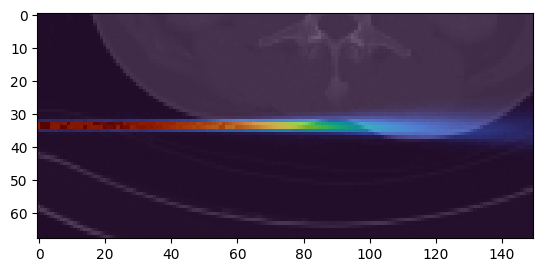

In [13]:
plt.imshow(X[0][0][34,:,:],cmap='gray')
plt.imshow(y[0][34,:,:],cmap='turbo',alpha=0.7)

In [ ]:
plt.imshow(y[0][])